In [117]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [118]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1,random_state=740)
data = data[:20000]
data.head(10)

,polarity,id,date,query,user,text
1586564,4,2190822209,Tue Jun 16 03:49:24 PDT 2009,NO_QUERY,Alex_Clough,...went to New Emperor as it was still open V...
1593258,4,2191903014,Tue Jun 16 06:10:21 PDT 2009,NO_QUERY,LeahChantelle,@lickmycupcakes Yay!!! It worked!! And thank y...
250171,0,1983150308,Sun May 31 12:36:04 PDT 2009,NO_QUERY,YesDiva32,@Mister_82 don't b hatin on my Mira Mira music
774617,0,2321582236,Wed Jun 24 21:15:45 PDT 2009,NO_QUERY,_WorldsApart_,"Where were u when #BPD broke 1,000 users onlin..."
219640,0,1976442803,Sat May 30 17:20:29 PDT 2009,NO_QUERY,greatbrytton,I really just want to be out of Dothan...more ...
364854,0,2048346997,Fri Jun 05 15:03:16 PDT 2009,NO_QUERY,MsCherrylicious,Fml got suckered into working til 930 and I'm ...
1081037,4,1968400415,Fri May 29 21:21:32 PDT 2009,NO_QUERY,pennamico,@aalmishal ???? ?? ????? ????? ????? ?????? ?...
352747,0,2031275962,Thu Jun 04 09:35:12 PDT 2009,NO_QUERY,darlingroland,"Today I could go get my new phone, probably wo..."
804759,4,1468569254,Tue Apr 07 02:28:17 PDT 2009,NO_QUERY,Scyranth,@SexySubKaylee heh heh dirty is always good gu...
903760,4,1694686706,Mon May 04 03:43:12 PDT 2009,NO_QUERY,LmaonadeStand,No school today - Not because of &quot;H1N1&qu...


# Data Visualization

In [119]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [120]:
data.head(10)

,polarity,id,date,query,user,text
1586564,4,2190822209,Tue Jun 16 03:49:24 PDT 2009,NO_QUERY,Alex_Clough,...went to New Emperor as it was still open V...
1593258,4,2191903014,Tue Jun 16 06:10:21 PDT 2009,NO_QUERY,LeahChantelle,@lickmycupcakes Yay!!! It worked!! And thank y...
250171,0,1983150308,Sun May 31 12:36:04 PDT 2009,NO_QUERY,YesDiva32,@Mister_82 don't b hatin on my Mira Mira music
774617,0,2321582236,Wed Jun 24 21:15:45 PDT 2009,NO_QUERY,_WorldsApart_,"Where were u when #BPD broke 1,000 users onlin..."
219640,0,1976442803,Sat May 30 17:20:29 PDT 2009,NO_QUERY,greatbrytton,I really just want to be out of Dothan...more ...
364854,0,2048346997,Fri Jun 05 15:03:16 PDT 2009,NO_QUERY,MsCherrylicious,Fml got suckered into working til 930 and I'm ...
1081037,4,1968400415,Fri May 29 21:21:32 PDT 2009,NO_QUERY,pennamico,@aalmishal ???? ?? ????? ????? ????? ?????? ?...
352747,0,2031275962,Thu Jun 04 09:35:12 PDT 2009,NO_QUERY,darlingroland,"Today I could go get my new phone, probably wo..."
804759,4,1468569254,Tue Apr 07 02:28:17 PDT 2009,NO_QUERY,Scyranth,@SexySubKaylee heh heh dirty is always good gu...
903760,4,1694686706,Mon May 04 03:43:12 PDT 2009,NO_QUERY,LmaonadeStand,No school today - Not because of &quot;H1N1&qu...


In [121]:
data['polarity'].unique()

array([4, 0])

In [122]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
1586564,1,2190822209,Tue Jun 16 03:49:24 PDT 2009,NO_QUERY,Alex_Clough,...went to New Emperor as it was still open V...
1593258,1,2191903014,Tue Jun 16 06:10:21 PDT 2009,NO_QUERY,LeahChantelle,@lickmycupcakes Yay!!! It worked!! And thank y...
250171,0,1983150308,Sun May 31 12:36:04 PDT 2009,NO_QUERY,YesDiva32,@Mister_82 don't b hatin on my Mira Mira music
774617,0,2321582236,Wed Jun 24 21:15:45 PDT 2009,NO_QUERY,_WorldsApart_,"Where were u when #BPD broke 1,000 users onlin..."
219640,0,1976442803,Sat May 30 17:20:29 PDT 2009,NO_QUERY,greatbrytton,I really just want to be out of Dothan...more ...


In [123]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.494000,1.999987e+09
std,0.499976,1.951726e+08
min,0.000000,1.467824e+09
25%,0.000000,1.956915e+09
50%,0.000000,2.002387e+09
75%,1.000000,2.178142e+09
max,1.000000,2.329143e+09


In [124]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  9880
No. of negative tagged sentences is: 10120


In [125]:
# get a word count per of text
def word_count(words):
    return len(words.split())

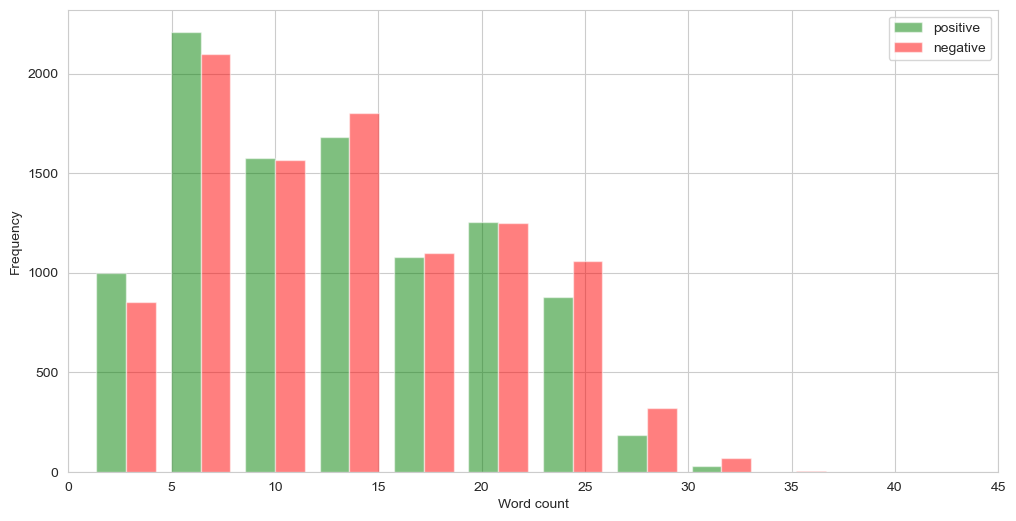

In [126]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [127]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6429),
 ('and', 3668),
 ('you', 2974),
 ('for', 2757),
 ('have', 1804),
 ('that', 1621),
 ("i'm", 1582),
 ('just', 1565),
 ('but', 1538),
 ('with', 1481),
 ('not', 1295),
 ('was', 1253),
 ('this', 1098),
 ('get', 993),
 ('good', 977),
 ('are', 949),
 ('like', 897),
 ('out', 895),
 ('all', 879),
 ('going', 822)]

<Axes: xlabel='polarity', ylabel='count'>

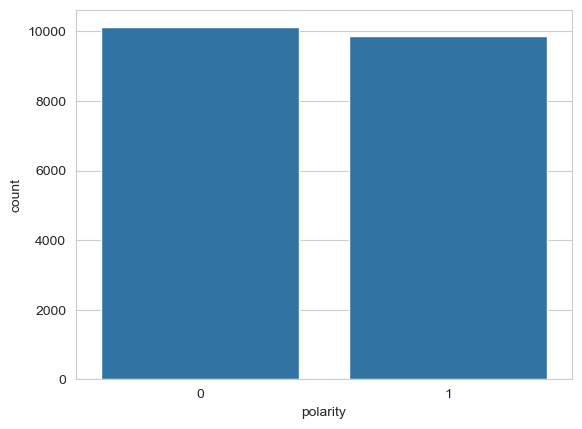

In [128]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [129]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [130]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
1586564,1,...went to New Emperor as it was still open V...
1593258,1,@lickmycupcakes Yay!!! It worked!! And thank y...
250171,0,@Mister_82 don't b hatin on my Mira Mira music
774617,0,"Where were u when #BPD broke 1,000 users onlin..."
219640,0,I really just want to be out of Dothan...more ...
364854,0,Fml got suckered into working til 930 and I'm ...
1081037,1,@aalmishal ???? ?? ????? ????? ????? ?????? ?...
352747,0,"Today I could go get my new phone, probably wo..."
804759,1,@SexySubKaylee heh heh dirty is always good gu...
903760,1,No school today - Not because of &quot;H1N1&qu...


In [131]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [132]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [133]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"they'd", 'himself', 'needn', 'can', 'for', "we're", "you're", "we've", "couldn't", 'is', 'ma', 'into', "i've", 'other', "she's", 'had', 'who', 'did', 'the', 'them', "shan't", 'theirs', 'wasn', "i'll", 'only', 'am', 't', 'again', 'at', "you'll", 'here', 'any', "they'll", 'i', 'his', 'be', 'ourselves', 'down', 'most', 'because', 'when', 'whom', 'my', 'yourself', 'what', 'above', "they've", 'this', 'weren', 'all', 'if', 'didn', "that'll", 'doesn', 'her', 'these', "we'll", 'before', 'isn', 'should', 'will', 'over', 'as', 'herself', 'hadn', 'mightn', 'or', 'by', "he'd", 'too', 'she', 'y', 'further', 'hers', 'won', 'once', 'about', "didn't", 'more', 'and', 'do', 'myself', 'up', 'their', 'which', 'few', 'that', 'to', 'after', 'wouldn', 'it', 'your', "won't", 'themselves', "you've", 'of', 'ours', "mightn't", 'but', "doesn't", 'our', 'those', 'shouldn', 'such', 'now', 've', 'were', "weren't", 'why', 'each', 'they', "wasn't", "isn't", 'with', 'doing', 'll', 'from', 'haven', 'been', 'where', "y

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [135]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'

# negation handling fix 预处理方法
def process_tweets_negation_handling_fix(tweet):
    # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    # 移除非字母数字、空格和'的字符
    tweet = re.sub(r"[^\w\s']", '', tweet)
    # --- 特殊否定缩写处理 ---
    # 1. 明确处理 can't → cannot
    tweet = re.sub(r"\bcan't\b", "cannot", tweet)
    # 2. 处理 won't → will not
    tweet = re.sub(r"\bwon't\b", "will not", tweet)
    # 3. 处理 shan't → shall not
    tweet = re.sub(r"\bshan't\b", "shall not", tweet)
    # 4. 处理 ain't → is not
    tweet = re.sub(r"\bain't\b", "is not", tweet)
    # --- 通用n't处理 ---
    # 将剩余n't替换为 not（如didn't → did not）
    tweet = re.sub(r"n't\b", " not", tweet)
    # --- 处理其他撇号为空格（如I'll → I ll）---
    tweet = re.sub(r"'", ' ', tweet)

    #tokenizing words
    tokens = word_tokenize(tweet)
    # Remove punctuations but remain ‘n't’
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]

    for w in tokens:
        if len(w) > 1:
            # 动词词性还原（解决 does→doe 问题）
            word = wordLemm.lemmatize(w, pos='v')
            # 名词词性还原（根据任务需求）
            word = wordLemm.lemmatize(word, pos='n')
            finalwords.append(word)
    return ' '.join(finalwords)

# negation & stopword handling fix 预处理方法
def process_tweets_negation_stopword_handling_fix(tweet):
    # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    # 移除非字母数字、空格和'的字符
    tweet = re.sub(r"[^\w\s']", '', tweet)
    # --- 特殊否定缩写处理 ---
    # 1. 明确处理 can't → cannot
    tweet = re.sub(r"\bcan't\b", "cannot", tweet)
    # 2. 处理 won't → will not
    tweet = re.sub(r"\bwon't\b", "will not", tweet)
    # 3. 处理 shan't → shall not
    tweet = re.sub(r"\bshan't\b", "shall not", tweet)
    # 4. 处理 ain't → is not
    tweet = re.sub(r"\bain't\b", "is not", tweet)
    # --- 通用n't处理 ---
    # 将剩余n't替换为 not（如didn't → did not）
    tweet = re.sub(r"n't\b", " not", tweet)
    # --- 处理其他撇号为空格（如I'll → I ll）---
    tweet = re.sub(r"'", ' ', tweet)
    #tokenizing words
    tokens = word_tokenize(tweet)

    # 移除非否定停用词
    negation_words = {
        # 基础否定词
        "not", "no", "never", "nor", "none", "nobody", "nothing",
        "neither", "nowhere", "without", "cannot"
        # 预处理后可能保留的否定词（如来自特殊缩写替换）
        # ,"isn", "aren", "wasn", "weren"
    }
    custom_stop_words = stopword.difference(negation_words)
    final_tokens = [w for w in tokens if w not in custom_stop_words]

    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]

    for w in final_tokens:
        if len(w) > 1:
            # 动词词性还原（解决 does→doe 问题）
            word = wordLemm.lemmatize(w, pos='v')
            # 名词词性还原（根据任务需求）
            word = wordLemm.lemmatize(word, pos='n')
            finalwords.append(word)
    return ' '.join(finalwords)

In [136]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets_negation_handling_fix(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [137]:
data.head(10)

,polarity,text,processed_tweets
1586564,1,...went to New Emperor as it was still open V...,go to new emperor a it be still open very nice...
1593258,1,@lickmycupcakes Yay!!! It worked!! And thank y...,yay it work and thank you blush
250171,0,@Mister_82 don't b hatin on my Mira Mira music,do not hatin on my mira mira music
774617,0,"Where were u when #BPD broke 1,000 users onlin...",where be when bpd break 1000 user online 628pm...
219640,0,I really just want to be out of Dothan...more ...,really just want to be out of dothanmore than ...
364854,0,Fml got suckered into working til 930 and I'm ...,fml get suckered into work til 930 and back in...
1081037,1,@aalmishal ???? ?? ????? ????? ????? ?????? ?...,
352747,0,"Today I could go get my new phone, probably wo...",today could go get my new phone probably will ...
804759,1,@SexySubKaylee heh heh dirty is always good gu...,heh heh dirty be always good gurl like how you...
903760,1,No school today - Not because of &quot;H1N1&qu...,no school today not because of quoth1n1quot bu...


# RNN - LSTM

In [138]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization, LeakyReLU, PReLU

## Hyperparameters

In [139]:
num_epochs = 10
max_len = 200
hidden_units = 16
LSTM_layers = 1
LSTM_units = 8
max_words = 10000
embedding_dim = 128
learning_rate = 0.001
dropout = 0.0

hidden_act= PReLU()
output_act= 'sigmoid'

## Converting text data into sequences

In [140]:
# Initialize the tokenizer, keeping only the top 'max_words' most frequent words
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the processed tweets to build the word index
tokenizer.fit_on_texts(data.processed_tweets)
# Convert each tweet (text) into a sequence of integer indices based on the word index
sequences = tokenizer.texts_to_sequences(data.processed_tweets)

# Pad or truncate all sequences to the same length ('max_len')
# - If a sequence is shorter than 'max_len', it will be padded with zeros at the beginning.
# - If a sequence is longer than 'max_len', it will be truncated from the beginning.
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  105 7058 3774]
 [   0    0    0 ...   46    7 2727]
 [   0    0    0 ... 4802 4802  290]
 ...
 [   0    0    0 ...   46    7  105]
 [   0    0    0 ...    1  492  189]
 [   0    0    0 ...   78   17  269]]


## Split Traning and Test data

In [141]:
train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)
print(np.unique(train_label))
print(np.unique(test_label))

[0 1]
[0 1]


## Creating and Traning LSTM Model

In [142]:
def create_lstm_model():
    model = Sequential()
    model.add(layers.Embedding(max_words, embedding_dim))
    for i in range(LSTM_layers):
        return_sequences = i < LSTM_layers - 1  # 只有在不是最后一层时才返回序列
        model.add(layers.LSTM(LSTM_units, dropout=dropout, return_sequences=return_sequences))
    model.add(layers.Dense(hidden_units, activation=hidden_act))
    model.add(layers.Dense(hidden_units, activation=hidden_act))
    model.add(layers.Dense(1, activation=output_act))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [143]:
model = create_lstm_model()

history = model.fit(
    train_data, train_label,
    epochs=num_epochs,
    validation_data=(test_data, test_label),
    verbose=2
)

# 仅处理negation的data processing
# negation handling fix 隐藏层2层16节点 lstm1层32节点  embedding层(5000,64)：
#   accuracy: 0.9607 - val_accuracy: 0.7178【一般】
# negation handling fix 隐藏层2层16节点 lstm1层32节点  embedding层(8000,128)：
#   accuracy: 0.9723 - val_accuracy: 0.7132【好】-> 测试完成 ->【模型效果No.2】
# negation handling fix 隐藏层2层16节点 lstm3层32节点  embedding层(5000,64)：
#   accuracy: 0.9513 - val_accuracy: 0.7218【没有好很多但lstm层更复杂】
# negation handling fix 隐藏层2层16节点 lstm1层8节点  embedding层(10000,128)：
#   accuracy: 0.9785 - val_accuracy: 0.7212【好】-> 测试完成 ->【模型效果No.1】
# negation handling fix 隐藏层2层16节点 lstm1层8节点  embedding层(10000,64)：
#   accuracy: 0.9662 - val_accuracy: 0.7140【一般】

# 处理negation和stopword的data processing
# negation & stopword handling fix 隐藏层3层8节点 lstm2层8节点  embedding层(5000,64)：
#   accuracy: 0.9419 - val_accuracy: 0.6935【一般】
# negation & stopword handling fix 隐藏层3层8节点 lstm2层64节点  embedding层(5000,64)：
#   accuracy: 0.9446 - val_accuracy: 0.7032【没有好很多但lstm层更复杂】
# negation & stopword handling fix 隐藏层3层8节点 lstm2层32节点  embedding层(5000,64)：
#   accuracy: 0.9454 - val_accuracy: 0.7092
# negation & stopword handling fix 隐藏层3层8节点 lstm2层32节点  embedding层(10000,256)：
#   accuracy: 0.9749 - val_accuracy: 0.7035【好】-> 测试完成 ->【模型效果No.3】
# negation & stopword handling fix 隐藏层3层8节点 lstm2层32节点  embedding层(10000,512)：
#   accuracy: 0.9769 - val_accuracy: 0.7115【没有好很多但embedding层更复杂】
# negation & stopword handling fix 隐藏层3层32节点 lstm1层16节点  embedding层(5000,64)：
#   accuracy: 0.9533 - val_accuracy: 0.7042【没有好很多但隐藏层更复杂】

# 测试Activation Function
# negation handling fix 隐藏层2层16节点 lstm1层8节点  embedding层(10000,128) hidden PReLU, output sigmod：
#   accuracy: 0.9810 - val_accuracy: 0.7180【好】-> 测试完成 ->【效果No.1】
# negation handling fix 隐藏层2层16节点 lstm1层8节点  embedding层(10000,128) hidden ReLU, output sigmod：
#   accuracy: 0.9789 - val_accuracy: 0.7135【一般】

Epoch 1/10
500/500 - 16s - 33ms/step - accuracy: 0.7105 - loss: 0.5601 - val_accuracy: 0.7480 - val_loss: 0.5099
Epoch 2/10
500/500 - 14s - 28ms/step - accuracy: 0.8189 - loss: 0.4086 - val_accuracy: 0.7487 - val_loss: 0.5317
Epoch 3/10
500/500 - 14s - 28ms/step - accuracy: 0.8636 - loss: 0.3157 - val_accuracy: 0.7462 - val_loss: 0.5864
Epoch 4/10
500/500 - 14s - 28ms/step - accuracy: 0.9007 - loss: 0.2364 - val_accuracy: 0.7352 - val_loss: 0.7622
Epoch 5/10
500/500 - 14s - 28ms/step - accuracy: 0.9265 - loss: 0.1807 - val_accuracy: 0.7228 - val_loss: 0.8572
Epoch 6/10
500/500 - 14s - 28ms/step - accuracy: 0.9459 - loss: 0.1374 - val_accuracy: 0.7230 - val_loss: 0.9992
Epoch 7/10
500/500 - 14s - 28ms/step - accuracy: 0.9576 - loss: 0.1066 - val_accuracy: 0.7143 - val_loss: 1.1114
Epoch 8/10
500/500 - 14s - 28ms/step - accuracy: 0.9668 - loss: 0.0830 - val_accuracy: 0.7145 - val_loss: 1.3725
Epoch 9/10
500/500 - 14s - 29ms/step - accuracy: 0.9753 - loss: 0.0645 - val_accuracy: 0.7157 - 

In [144]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (32, 200, 128)         │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (32, 8)                │         4,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 16)               │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 16)               │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 1)                │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,854,501 (14.70 MB)

 Trainable params: 1,284,833 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,569,668 (9.80 MB)

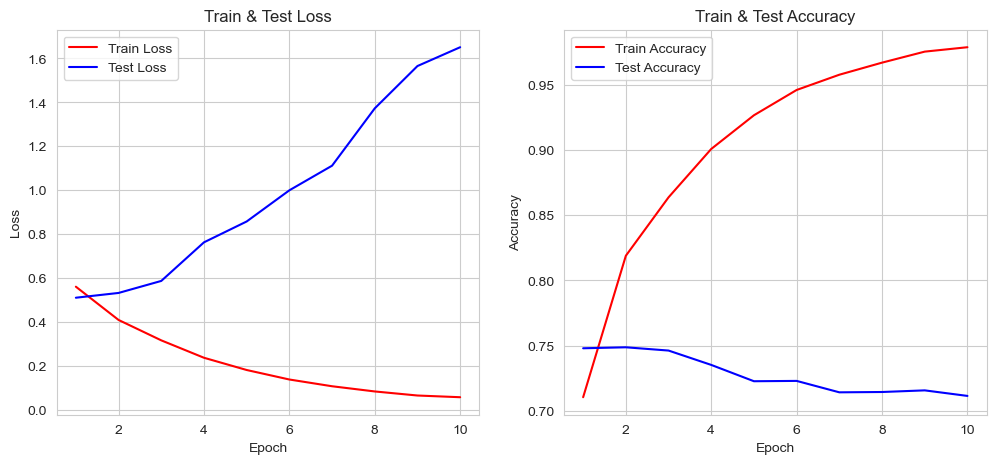

In [145]:
colors = ['red', 'orange', 'green', 'blue', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Train Loss', color=colors[0])
axes[0].plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Test Loss', color=colors[3])
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Train & Test Loss")
axes[0].legend()

axes[1].plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Train Accuracy', color=colors[0])
axes[1].plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Test Accuracy', color=colors[3])
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Train & Test Accuracy")
axes[1].legend()